![Logo.png](./images/logo_isen.png)......................![logosimplon](./images/logo_simplon.png)


# TAUX DE DESABONNEMENT

L'objectif de notre étude consiste à étudier le taux de desabonnement des clients d'une entreprise.

Le taux de désabonnement des clients se produit lorsque les clients ou les abonnés cessent de faire affaire avec 
une entreprise ou un service.

Une entreprise veut savoir quels sont les clients qui vont se désabonner en examinant certains des attributs 
importants et en y appliquant le Machine Learning ou le Deep Learning.

Le dataset est assez représentatif, il comporte 10 000 lignes et 14 colonnes.

Données traitées dans le dataset :

- numéro de ligne

- identifiant client

- son nom

- le score client

- son pays (données à encoder)

- son sexe ( données à encoder)

- son age

- tenure 

- balance 

- numéro du produit

- possède ou non une cb

- membre actif

- son salaire

- sortie 


On cherche à savoir si le client se désabonne ou pas en fonction des autres critères (variables du dataset).
La variable que l'on va étudier est donc "exited"
on supprimera par la suite les colonnes qui ne sont pas pertinentes pour l'analyse.

# Traitement des données

## 2. Importation du fichier de données.

* importation de la librairy pandas.
=> librairie python qui permet de manipuler facilement des données à analyser.

missions: 
* Lecture du fichier au format csv.
* afficher grâce à la fonction head nos données



In [1]:
import pandas as pd
dataset = pd.read_csv('./dataset/data.csv')
dataset.head()

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Voici le résultat attendu.

![image1](./images/image1.png)

Au vu des premiers éléments de notre fichier, nous constatons que certaines variables du jeu de données sont numériques
et d'autres sont catégorielles.


mission :

via la fonction info afficher l'ensemble des variables du dataset ainsi que leur type.

In [2]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_ligne       10000 non-null  int64  
 1   ID_Client       10000 non-null  int64  
 2   Nom             10000 non-null  object 
 3   Score_Credit    10000 non-null  int64  
 4   Pays            10000 non-null  object 
 5   Sex             10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   Num_Produit     10000 non-null  int64  
 10  il_a_CrCard     10000 non-null  int64  
 11  Membre_actif    10000 non-null  int64  
 12  Salaire_estime  10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


Voici le résultat que vous devez obtenir:



![image2](./images/image2.png)

La fonction "isnull" nous sert déterminer la présence de valeurs manquantes au sein de notre dataset.
En rajoutant la fonction "sum", on peut comptabiliser ces valeurs manquantes.

mission :

afficher les valeurs manquantes

In [3]:
dataset.isnull().sum()

num_ligne         0
ID_Client         0
Nom               0
Score_Credit      0
Pays              0
Sex               0
Age               0
Tenure            0
Balance           0
Num_Produit       0
il_a_CrCard       0
Membre_actif      0
Salaire_estime    0
Exited            0
dtype: int64

![image3](./images/image3.png)

## 3. traitement des variables catégorielles

Les variables catégorielles correspondent aux variables non numériques. Ci-dessous la fonction qui permet d'afficher les variables catégorielles. 

 categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

missions :

afficher gràce à la fonction len  : 'il y a 3 variables catégorielles "

et les variables sont :['Nom', 'Pays', 'Sex']


In [4]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['Nom', 'Pays', 'Sex']


Notre jeu de données comporte 3 variables qualitatives qu'il va falloir encoder c'est à dire rendre numérique pour pouvoir exploiter les données par la suite.




### Encodage des variables catégorielles 'Nom', 'Pays', 'Sex'

on importe pour cela la bibliothéque labelencoder.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

=> LabelEncoder** peut transformer [chien, chat, chien, souris, chat] en [1,2,1,3,2],il a transformé les données 


exemple encodage  de la variable pays : 

**Encodage de la variable 'Pays'**

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lab = LabelEncoder()
dataset["Pays"] = lab.fit_transform(dataset["Pays"])
dataset["Pays"]


0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Pays, Length: 10000, dtype: int32

## A vous de jouer avec les variables 'Nom' et 'Sex'

**Encodage de la variable 'Nom'**

In [6]:
lab = LabelEncoder()
dataset["Nom"] = lab.fit_transform(dataset["Nom"])
dataset["Nom"].head()

0    1115
1    1177
2    2040
3     289
4    1822
Name: Nom, dtype: int32

**Encodage de la variable 'Sex'**

In [7]:
lab = LabelEncoder()
dataset["Sex"] = lab.fit_transform(dataset["Sex"])
dataset["Sex"]


0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Sex, Length: 10000, dtype: int32

# Nous affichons de nouveau notre dataset via head

In [8]:
dataset.head()



,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Notre dataset est maintenant entièrement numérique et prêt à être exploité pour la modélisation.
Les variables qui étaient catégorielles ont désormais un type Integer.

![image](./images/categorielle.PNG)


Maintenant, que nos données sont encodées nous pouvons  les visualiser à travers un graphique .
Pour cela,  nous pouvons nous pouvons importer la bibliothèque matplotlib (=>sert à créer des graphiques et les personnaliser)
grâce aux fonctions hist et show afficher le rendu .

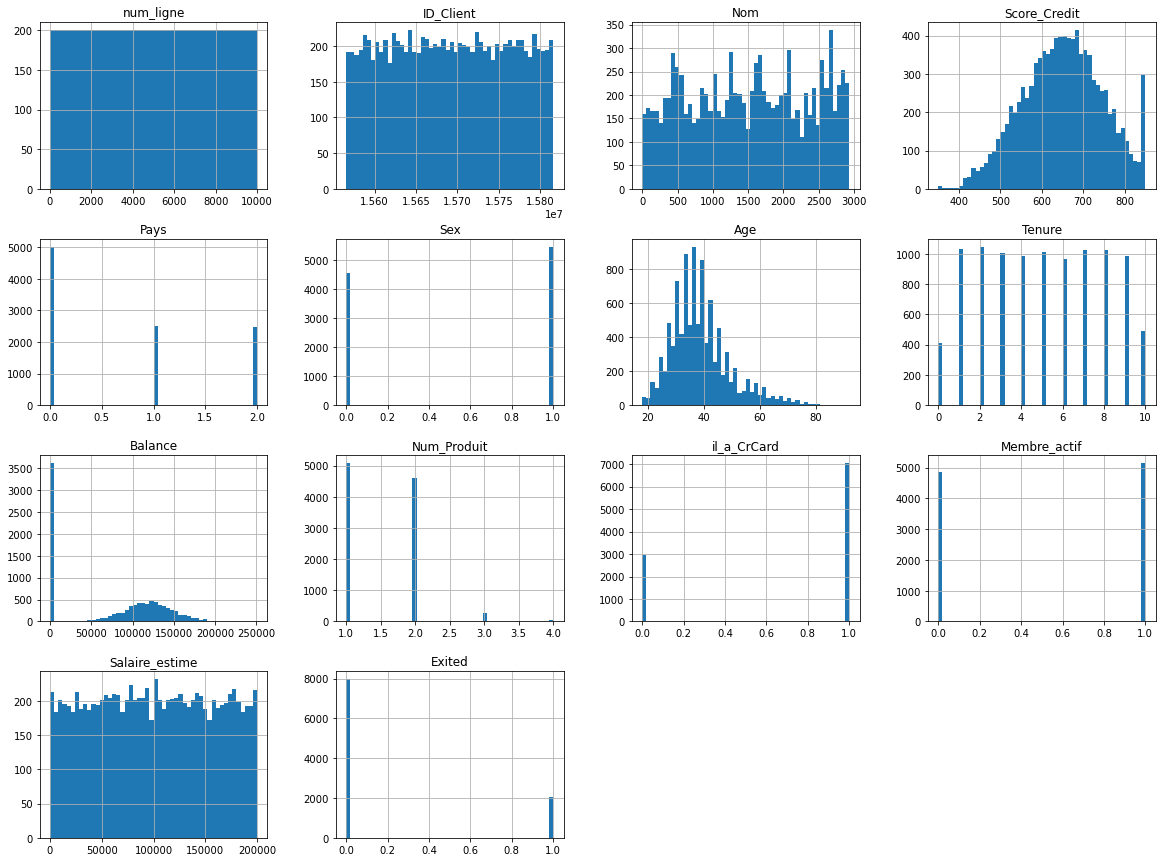

In [9]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

Voici le rendu attendu.

![image4](./images/image4.png)

Nombre de labels: cardinalité

Le nombre de labels dans une variable qualitative est appelé la cardinalité. Un nombre élevé de labels dans une 
variable est appelé cardinalité élevée. Une cardinalité élevée peut poser de sérieux problèmes dans le modèle 
d'apprentissage automatique. Donc, Afficher la cardinalité de chaque variable qualitative.


## 4. Définition de nos variables: Notre variable target (Y) est la variable 'Exited' en fonction des autres .

Quelques infos :

la variable target est la variable que nous devons expliquer ou prédire (Y) ici il s'agit de la colonne "Exited" qui indique si le client est actif ou pas.

Pour cela nous allons supprimer les données qui ne seront pas utiles pour la suite, puis nous allons définir les différentes matrices X et Y. 


## Suppression des colonnes non exploitables.

In [10]:
# La fonction drop nous permet de supprimer toutes les colonnes non utiles et de garder ici les colonnes des variables
#explicatives
X = dataset.drop([], axis=1)
X = dataset.drop(["Exited", "num_ligne", "ID_Client", "Nom"], axis=1)

In [11]:

# On ne récupère que la colonne de la variable à étudier "Exited"
y = dataset['Exited']
y = dataset['Exited'].values.reshape(-1,1)

# On affiche la taille des matrices X et Y grace à la fonction "shape"
print(X.shape)
print(y.shape)


(10000, 10)
(10000, 1)


Y correspond à la matrice (tableau) d'une colonne et 10 000 lignes, c'est à dire la variable à expliquer "Exited".

X correspond à la matrice (tableau) de 10 colonnes et 10 000 lignes, correspondant à nos 10 variables explicatives.

Que constatez-vous ? 


## 5.Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)

Grace à la librairie train_test_split de la bibliothèque sklearn.model_selection,
(=> sert à répartir  aléatoirement les lignes d’une base de données d’un côté ou de l’autre.)



<u>test_size = 0.2</u>

on va séparer notre jeu de données en jeu d'entraînement (80% de nos données) et en jeu de test(20% de nos données totales).

<u> random_state </u> :

comme son nom l'indique, est utilisé pour initialiser le générateur de nombres aléatoires interne, qui décidera de la division des données en indices de train et de test.

Il s'agit de vérifier et de valider les données lors de l'exécution du code plusieurs fois. La définition d'un random_state fixe garantira que la même séquence de nombres aléatoires est générée chaque fois que vous exécutez le code. Et à moins qu'il y ait un autre caractère aléatoire présent dans le processus, les résultats produits seront les mêmes que toujours. Cela aide à vérifier la sortie.

In [12]:
from sklearn.model_selection import train_test_split

#compléter le paramêtre MANQUANT : 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Affichage des matrices de variables explicatives pour le jeu d'apprentissage et de test.(X_train, X_test)


## 6.Standariser le jeu d'entrainement et de test à l'aide de StandardScaler

Notre jeu de données comporte une grande disparité de valeurs. On va donc les standardiser.
La standardisation, qui signifie "centrer réduire", désigne la conversion des données vers un format standard 
commun et normalisé.

L’objectif de la standardisation est de rendre les données lisibles par l’ordinateur ou de les structurer de 
sorte qu’un collaborateur puisse les lire et les comprendre. Une fois acquises, les différentes données doivent 
être standardisées afin d’être exploitées et étudiées uniformément.



In [13]:
#récupération des colonnes de la matrice X pour le jeu d'apprentissage
cols = X_train.columns

In [14]:
from sklearn.preprocessing import StandardScaler
#Standardiser les fonctionnalités en supprimant la moyenne et en mettant à l'échelle la variance unitaire
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_test

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

Que remarquez-vous ? 

In [15]:
#transformation des données en dataframe, puis affichage du dataframe
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime
0,0.169582,1.519198,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-2.304559,0.313126,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-1.191196,-0.892945,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,0.035566,1.519198,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,2.056114,1.519198,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,0.313126,-1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,1.478815,1.519198,-1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,0.901515,-0.892945,0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-0.624205,1.519198,-1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


#### AVANT D'ALLER PLUS LOIN QUELQUES NOTIONS SPECIFIQUES

![image](./images/INDICATEURS.PNG)

## 7.Création du modèle de régression logistique et entraînement sur les données d'entraînement

L'objectif de notre étude est de savoir si les clients souhaitant se désabonner sont bien classés ou non. 
On va commencer notre modélisation par une régression logistique trés utilisé pour les modèles de classification.



La régression logistique est un modèle statistique permettant d’étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. Il s’agit d’un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien. 

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive (valeur de 1) ou non (valeur de 0) à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1. Lorsque la valeur prédite est supérieure à un seuil, l’événement est susceptible de se produire, alors que lorsque cette valeur est inférieure au même seuil, il ne l’est pas.


In [16]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instancier le modèle via le solver qui est un algorithme  capable de résoudre des problèmes de logique
# nous sommes dans une classification binaire(se désabonner ou pas)
logreg = LogisticRegression(solver='liblinear', random_state=0)

print(y_train.shape)
# adapter le modèle
logreg.fit(X_train, y_train)

(8000, 1)


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0, solver='liblinear')

## Prediction des résultats du modèle sur l'ensemble du test

In [17]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Comparaison de l'accuracy du modèle sur l'ensemble d'apprentissage et l'ensemble de test

In [18]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8086
Test set score: 0.8070


L'accuracy entre nos données d'apprentissage et nos données de jeu de test sont quasi identiques, ce qui 
signifie que notre modèle a été bien entrainé.

## Affichage de la matrice de confusion, TP, TN, FP, FN sur le jeu du test en utilisant la fonction confusion_matrix

<AxesSubplot:>

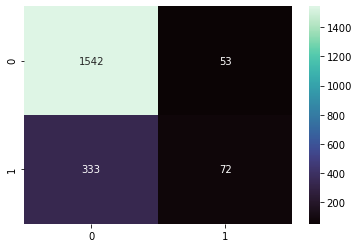

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf, cmap='mako', annot=True, fmt='d')

In [20]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1542   53]
 [ 333   72]]

True Positives(TP) =  1542

True Negatives(TN) =  72

False Positives(FP) =  53

False Negatives(FN) =  333


## On Calcule les métriques de classification (accuracy, classification error, precision, recall, specificity) en utilisant seulement les valeurs de TP, TN, FP, FN.

In [21]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))



# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))



# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# print Specificity score

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.8070
Classification error : 0.1930
Precision : 0.9668
Recall or Sensitivity : 0.8224
Specificity : 0.5760


Nous allons procéder à une réduction de la dimensionnalité de notre jeu de données pour savoir si l'on peut
obtenir de meilleurs résultats. On vaeffectuer une modélisation de régression logistique avec PCA. 

### Conclusion:


Pour aller plus loin , les méthodes qui peuvent être testées pour améliorer les performances du modèle.

- modèle de régression logistique avec PCA

-  modèle de forêt d'arbres décisionnels (Méthode Random Forest)

-  modèle de forêt d'arbres décisionnels (Méthode Random Forest) avec PCA (réduction de dimensionnalité)

- modèle par réseaux de neurones.

A quoi servent ces bibliothèques : 
    
* **pandas** est une librairie python qui permet de manipuler facilement des données à analyser.

* **Scipy** utilise les tableaux et matrices du module NumPy.

* Le module **pyplot** de **matplotlib**  sert à créer des graphiques et les personnaliser.
(travailler sur les axes, le type de graphique, sa forme et même rajouter du texte).

* **Scikit-learn** sert à extraire la structure de données complexes (textes, images), et à les classifier en utilisant des techniques correspondant à l'état de l'art
Scikit-learn est une bibliothèque libre Python destinée à l'apprentissage automatique.

* **simple imputer** est utilisé pour completer les valeurs manquantes

* **LabelEncoder** peut transformer [chien, chat, chien, souris, chat] en [1,2,1,3,2],il 
 transforme les données.

* Le **One-Hot-Encoding**  transforme  le résultat en binaire.

* **train_test_split** sert à répartir  aléatoirement les lignes d’une base de données d’un côté ou de l’autre.

* **PredefinedSplit**  Validateur croisé fractionné prédéfini.
fournit des indices de train / test pour diviser les données en ensembles de train / test à l'aide d'un 
schéma prédéfini.

* **linear model** pour utiliser la regression logistique.

* **mean squarred error** sert pour calculer l' erreur quadratique moyenne ( MSE ).

* **pca** sert à Calculez les composantes principales de vos données.

* random forest classifier : L'algorithme des forêts aléatoires est connu pour être un des classifieurs les plus 
efficaces « out-of-the-box ».

* **Tensorflow** sert à  entraîner et exécuter des réseaux de neurones profonds pour la classification de chiffres 
manuscrits, pour la reconnaissance d’image, pour le plongement lexical, pour les réseaux de neurones 
récurrents, pour les modèles ” sequence-to-sequence ” de traduction automatique, pour le traitement naturel du 
langage, et pour les simulations basées sur les équations aux dérivées partielles.

* **sea born** est utilisé pour la data visualisation en complément de matplotlib
